he objective of this project is to obtain the closing prices of Apple and Tesla from Yahoo Finance using yfinance, calculate their cumulative returns and volatility over the past 5 years, and display their risk-to-return ratio specifically for the year 2024.

In [22]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [152]:
tickers = ["AAPL", "TSLA"]

data = yf.download(tickers,start = "2020-01-01", end = "2024-12-31")["Close"]


[*********************100%***********************]  2 of 2 completed


In [ ]:
# observing data

In [154]:
data.head()

Ticker,AAPL,TSLA
Date,,
2020-01-02,72.620857,28.684000
2020-01-03,71.914825,29.534000
2020-01-06,72.487846,30.102667
2020-01-07,72.146935,31.270666
2020-01-08,73.307510,32.809334


In [156]:
data.describe()

Ticker,AAPL,TSLA
count,1257.000000,1257.000000
mean,151.900499,213.279443
std,41.943932,83.321515
min,54.378582,24.081333
25%,126.750748,173.860001
50%,150.537048,220.190002
75%,176.443726,259.670013
max,258.396667,479.859985


In [158]:
data.isnull().sum()

Ticker
AAPL    0
TSLA    0
dtype: int64

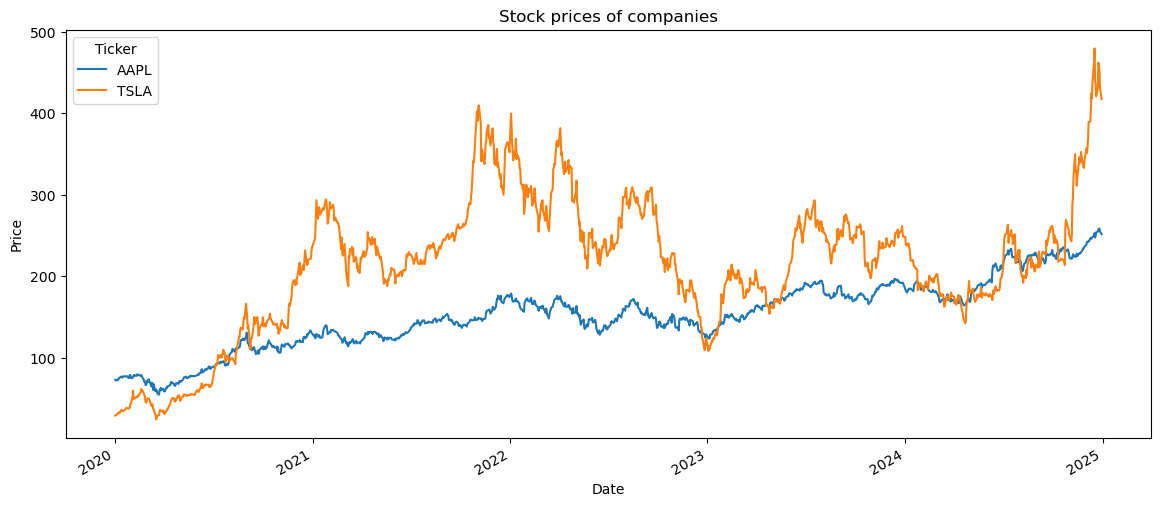

In [160]:
# visualizing stock prices for 5 years

data.plot(figsize=(14,6), title="Stock prices of companies")
plt.ylabel("Price")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

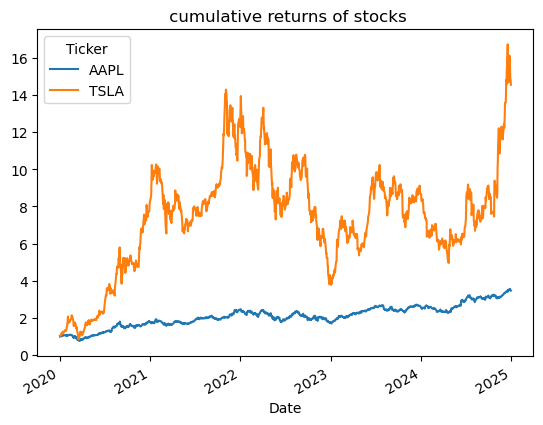

In [184]:
#calculating daily and cumulative returns and visualizing them for 5 years
returns = data.pct_change().dropna()
cumulative_returns = (returns+1).cumprod()
cumulative_returns.plot(title = " cumulative returns of stocks")
plt.show

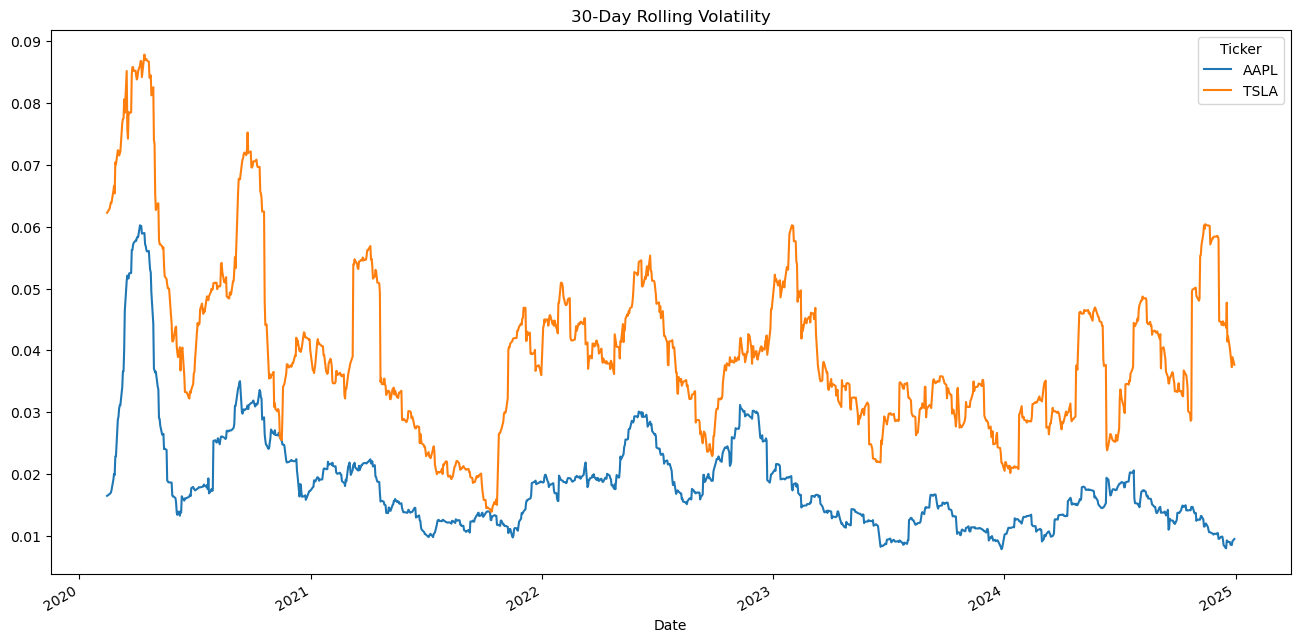

In [166]:
# calculating volatility for 30 years window and visualizing it
rolling_volatility = returns.rolling(window=30).std()

rolling_volatility.plot(title="30-Day Rolling Volatility" , figsize = (16,8) )
plt.show()


In [ ]:
# lets find risk to return ratio of these stocks

In [186]:
daily_returns = data.pct_change()# daily returns
cumulative_30day = (1 + daily_returns).rolling(30).apply(np.prod, raw=True) - 1 # cumulative returns for 30 days windows
cumulative_30day = cumulative_30day.dropna()

In [188]:
return_to_risk = cumulative_30day / rolling_volatility # calculate return to risk with volatility and cumulatşve return
return_to_risk = return_to_risk.dropna()




In [172]:
return_to_risk.head()

Ticker,AAPL,TSLA
Date,,
2020-02-14,5.114578,13.808583
2020-02-18,4.464838,14.906566
2020-02-19,4.845236,16.269815
2020-02-20,4.458226,14.358190
2020-02-21,2.004625,13.013934


In [190]:
return_to_risk.index = pd.to_datetime(return_to_risk.index) # turn index into datetime

In [194]:
rts_2024 = return_to_risk[return_to_risk.index.year == 2024] # take data for 2024

<function matplotlib.pyplot.show(close=None, block=None)>

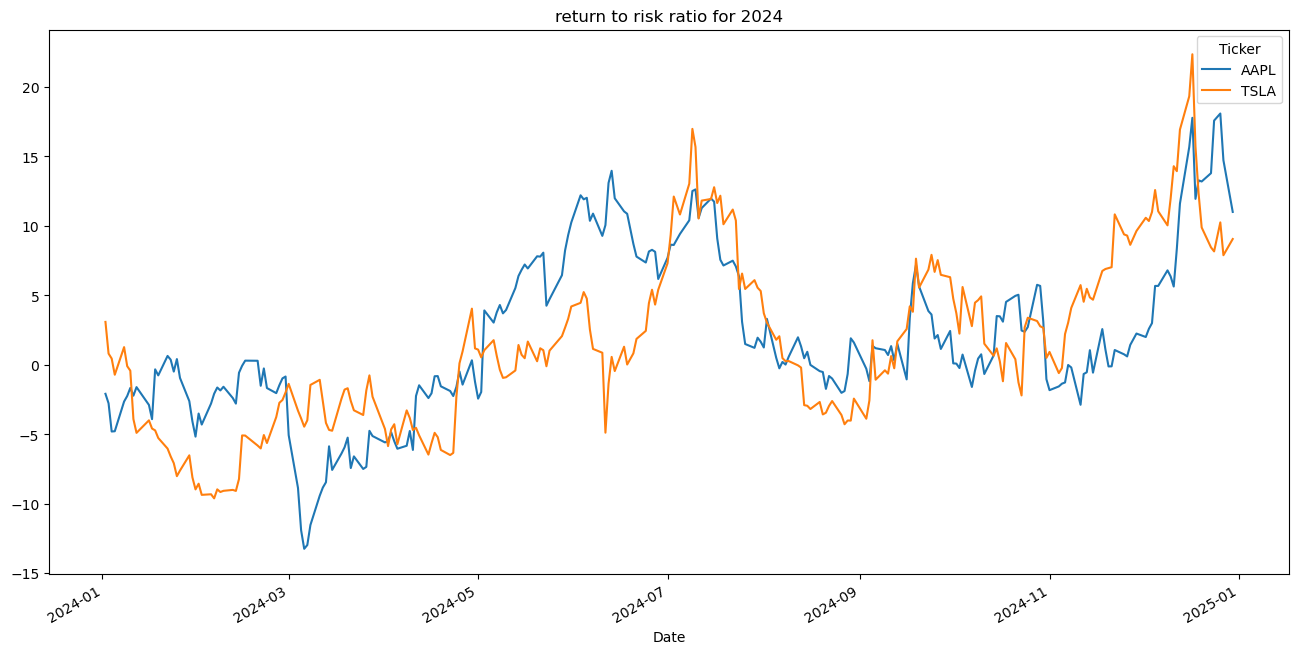

In [192]:
rts_2024.plot(title = "return to risk ratio for 2024" ,figsize = (16,8)) 
plt.show